In [1]:
#importation des bibliothèques Python :

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#chargement des données csv:

Data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv')

In [5]:
#exploration des données:

print(Data.head())


           Date      Open      High       Low    Close*  Adj Close**  \
0  Jun 30, 2023  30441.35  31256.86  29600.28  30477.25     30477.25   
1  Jun 29, 2023  30086.19  30796.25  30057.20  30445.35     30445.35   
2  Jun 28, 2023  30696.56  30703.28  29921.82  30086.25     30086.25   
3  Jun 27, 2023  30274.32  31006.79  30236.65  30688.16     30688.16   
4  Jun 26, 2023  30480.52  30636.03  29955.74  30271.13     30271.13   

        Volume  
0  26387306197  
1  13180860821  
2  14571500779  
3  16428827944  
4  16493186997  


In [6]:
#lire les informations :

print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         182 non-null    object 
 1   Open         182 non-null    float64
 2   High         182 non-null    float64
 3   Low          182 non-null    float64
 4   Close*       182 non-null    float64
 5   Adj Close**  182 non-null    float64
 6   Volume       182 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ KB
None


In [7]:
# Récupérer la liste des colonnes:

colonnes = Data.columns
print(Data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')


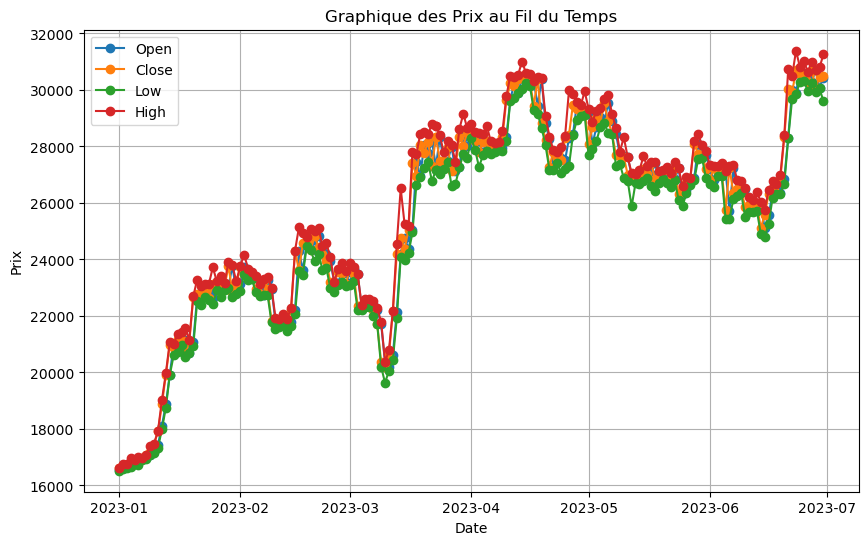

In [8]:
#1.#Visualiser les prix d'ouverture, de clôture, le plus bas et le plus haut au fil du temps:

# Convertir la colonne 'Date' en type datetime pour assurer un ordre chronologique correct:

Data['Date'] = pd.to_datetime(Data['Date'])

# Création d'un graphique en ligne pour les prix au fil du temps:

plt.figure(figsize=(10, 6))
plt.plot(Data['Date'], Data['Open'], label='Open', marker='o')
plt.plot(Data['Date'], Data['Close*'], label='Close', marker='o')
plt.plot(Data['Date'], Data['Low'], label='Low', marker='o')
plt.plot(Data['Date'], Data['High'], label='High', marker='o')

# Ajout de titres, légendes, etc:

plt.title('Graphique des Prix au Fil du Temps')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

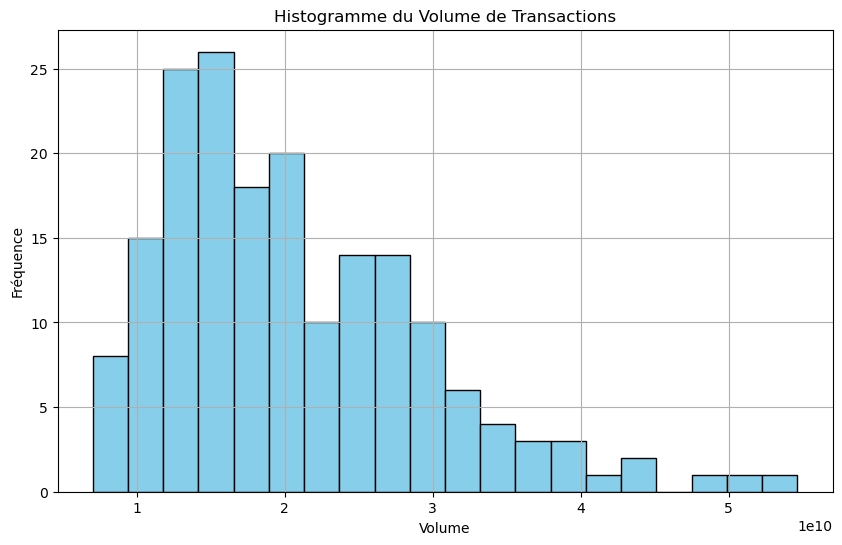

In [9]:
#2.#Histogramme du Volume de Transactions :

# Création d'un histogramme du volume de transactions:

plt.figure(figsize=(10, 6))
plt.hist(Data['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme du Volume de Transactions')
plt.xlabel('Volume')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

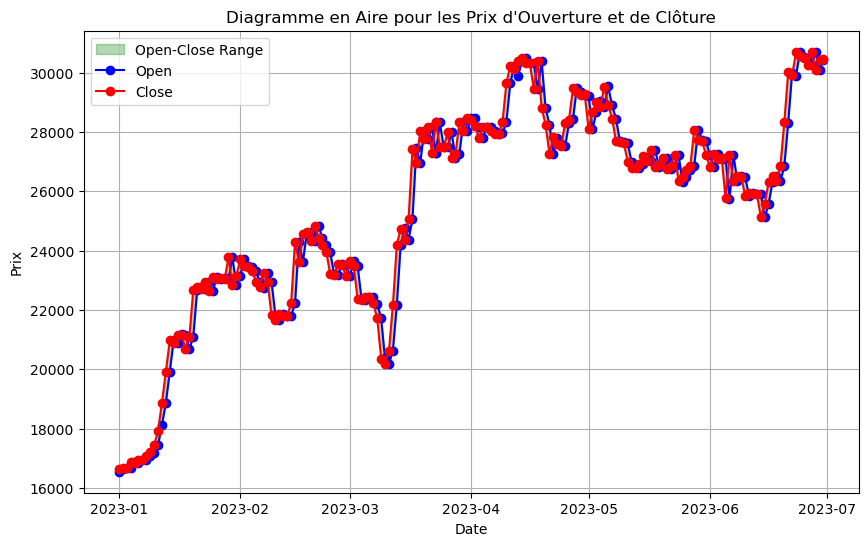

In [10]:
#3.#Diagramme en Aire pour les Prix d'Ouverture et de Clôture :

# Création d'un diagramme en aire pour les prix d'ouverture et de clôture:

plt.figure(figsize=(10, 6))
plt.fill_between(Data['Date'], Data['Open'], Data['Close*'], color='green', alpha=0.3, label='Open-Close Range')
plt.plot(Data['Date'], Data['Open'], marker='o', label='Open', color='blue')
plt.plot(Data['Date'], Data['Close*'], marker='o', label='Close', color='red')
plt.title('Diagramme en Aire pour les Prix d\'Ouverture et de Clôture')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


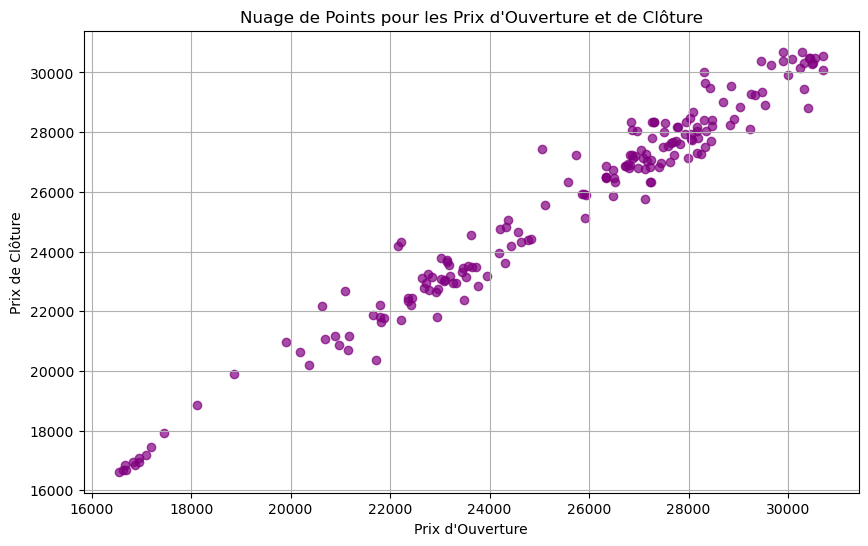

In [11]:
#4.#Nuage de Points pour les Prix d'Ouverture et de Clôture :

# Création d'un nuage de points pour les prix d'ouverture et de clôturem:

plt.figure(figsize=(10, 6))
plt.scatter(Data['Open'], Data['Close*'], color='purple', alpha=0.7)
plt.title('Nuage de Points pour les Prix d\'Ouverture et de Clôture')
plt.xlabel('Prix d\'Ouverture')
plt.ylabel('Prix de Clôture')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Préparation des données:

# Charger les données depuis le fichier CSV:
Data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv')

# Convertir la colonne 'Date' en objet datetime:
Data['Date'] = pd.to_datetime(Data['Date'])

# Créer une nouvelle colonne pour les trimestres:
Data['Trimestre'] = Data['Date'].dt.to_period("Q")

# Sélectionner les colonnes numériques pour la réduction de dimensionnalité:
colonnes_numeriques = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
donnees_numeriques = Data[colonnes_numeriques]

# Normaliser les données:
scaler = StandardScaler()
donnees_normalisees = scaler.fit_transform(donnees_numeriques)


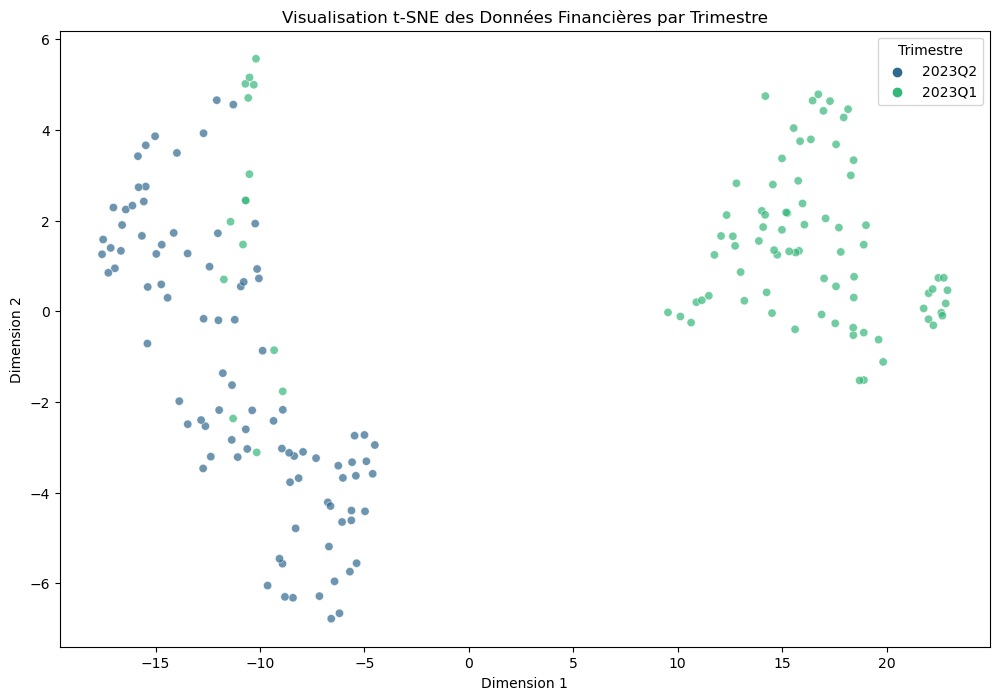

In [19]:
# Appliquer t-SNE:
tsne = TSNE(n_components=2, random_state=42)
donnees_tsne = tsne.fit_transform(donnees_normalisees)

# Création d'un DataFrame pour la visualisation:
Data_tsne = pd.DataFrame(data=donnees_tsne, columns=['Dimension 1', 'Dimension 2'])
Data_tsne['Trimestre'] = Data['Trimestre']

# Utiliser une palette de couleurs plus légère:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=Data_tsne, hue='Trimestre', palette='viridis', alpha=0.7)
plt.title('Visualisation t-SNE des Données Financières par Trimestre')
plt.show()


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import matplotlib.pyplot as plt

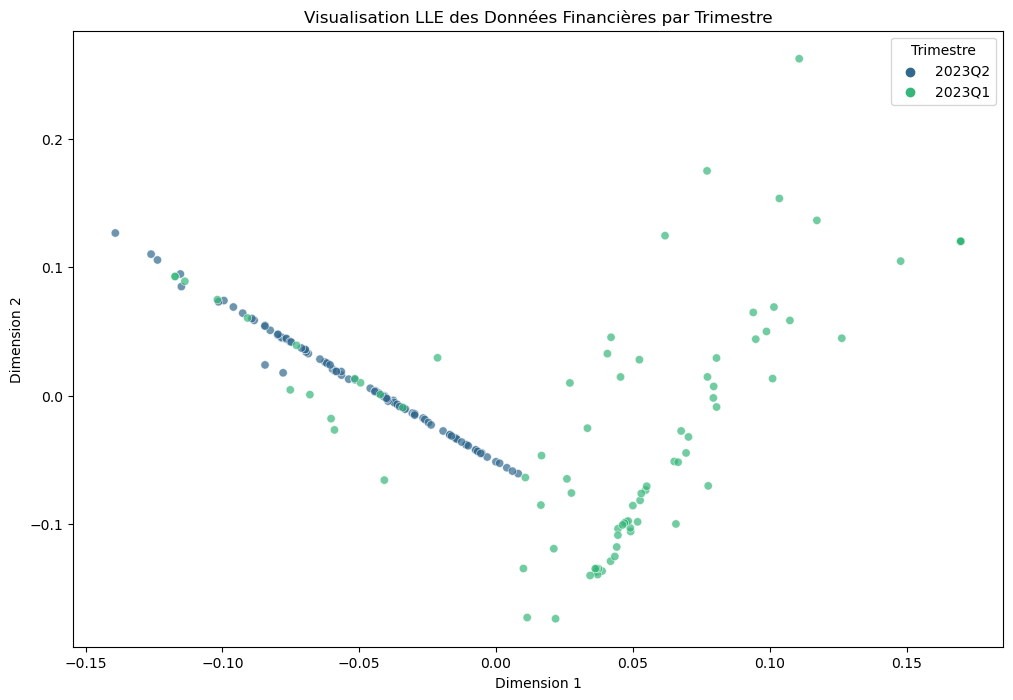

In [39]:
# Charger les données depuis le fichier CSV:
Data = pd.read_csv('bitcoin_scraped.csv')

# Convertir la colonne 'Date' en objet datetime:
Data['Date'] = pd.to_datetime(Data['Date'])

# Créer une nouvelle colonne pour les trimestres:
Data['Trimestre'] = Data['Date'].dt.to_period("Q")

# Sélectionner les colonnes numériques pour la réduction de dimensionnalité:
colonnes_numeriques = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
donnees_numeriques = Data[colonnes_numeriques]

# Normaliser les données:
scaler = StandardScaler()
donnees_normalisees = scaler.fit_transform(donnees_numeriques)

# Appliquer LLE:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
donnees_lle = lle.fit_transform(donnees_normalisees)

# Création d'un DataFrame pour la visualisation:
Data_lle = pd.DataFrame(data=donnees_lle, columns=['Dimension 1', 'Dimension 2'])
Data_lle['Trimestre'] = Data['Trimestre']

# Utiliser une palette de couleurs plus légère:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=Data_lle, hue='Trimestre', palette='viridis', alpha=0.7)
plt.title('Visualisation LLE des Données Financières par Trimestre')
plt.show()


# UMAP


In [23]:
!pip install umap-learn

In [24]:
import umap

In [25]:
import sklearn
import matplotlib.pyplot as plt

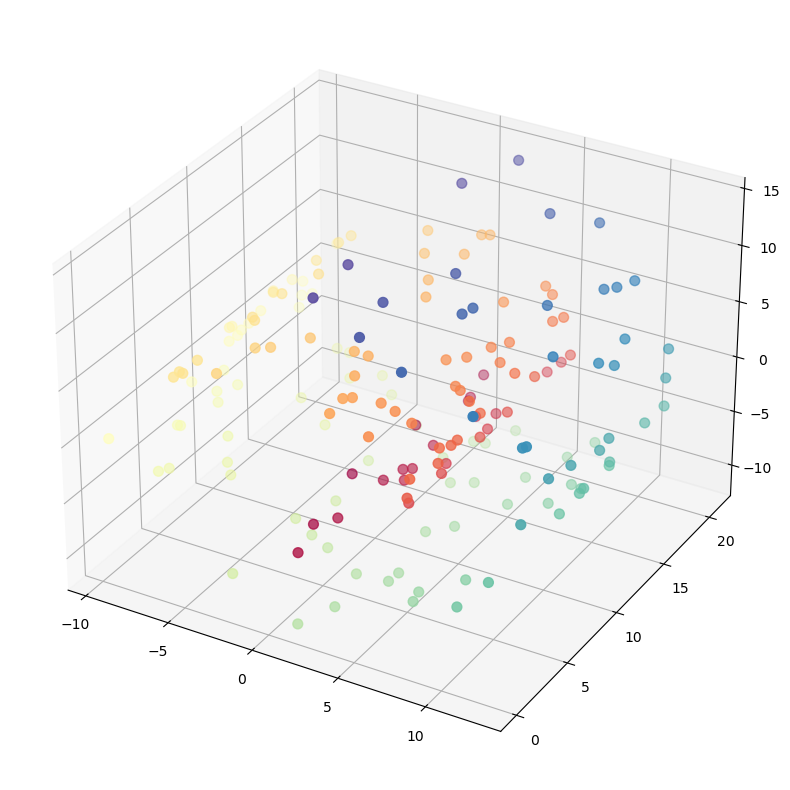

In [93]:
import pandas as pd
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv')  

# Récupérez la liste des colonnes
columns_list = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Sélectionnez les colonnes d'intérêt
selected_data = data[columns_list]

# Appliquez la méthode Swiss Roll
X, color = make_swiss_roll(n_samples=len(data))

# Créez la figure 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Affichez les données dans l'espace 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, s=50, cmap=plt.cm.Spectral)
plt.show()


In [94]:
##
import pandas as pd
from umap import UMAP

data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv')  
# Récupérez la liste des colonnes
columns_list = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Sélectionnez les colonnes d'intérêt
selected_data = data[columns_list]

um = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
embeddings = um.fit_transform(selected_data)

print(embeddings.shape)



(182, 2)


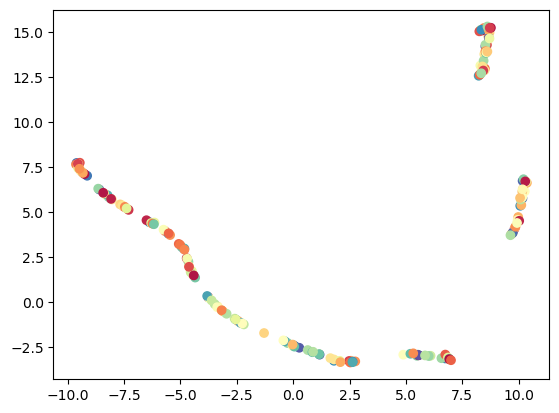

In [113]:

# Supposons que votre DataFrame s'appelle 'data'
data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv') 

# Récupérez la liste des colonnes
columns_list = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Sélectionnez les colonnes d'intérêt
selected_data = data[columns_list]

um = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
embeddings = um.fit_transform(selected_data)

# Supposons que 'color' représente les couleurs de chaque point
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=color, cmap=plt.cm.Spectral)
plt.show()



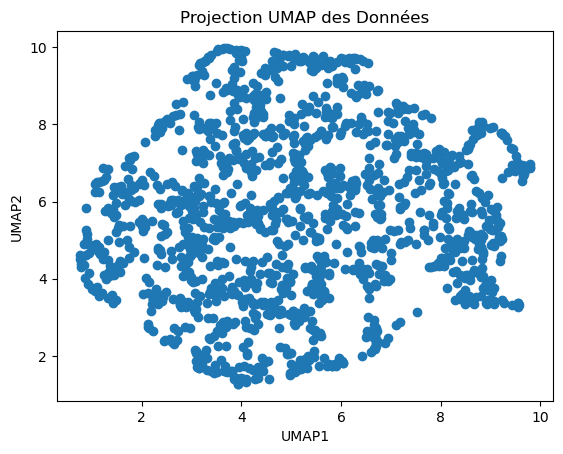

In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger votre DataFrame
# Remarque : Assurez-vous d'avoir installé les bibliothèques nécessaires

# Convertir la première colonne (supposée être la colonne de date) en datetime
Data.iloc[:, 0] = pd.to_datetime(Data.iloc[:, 0])

# Sélectionner les caractéristiques numériques
features = Data.iloc[:, 1:].select_dtypes(include=['float64', 'int64'])

# Normaliser les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Appliquer UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(scaled_features)

# Créer un DataFrame avec les résultats UMAP
umap_Data = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Concaténer les résultats UMAP avec le DataFrame d'origine
umap_Data = pd.concat([Data.iloc[:, 0], umap_Data], axis=1)

# Visualiser les résultats UMAP
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'])
plt.title('Projection UMAP des Données')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


# ISOMAP

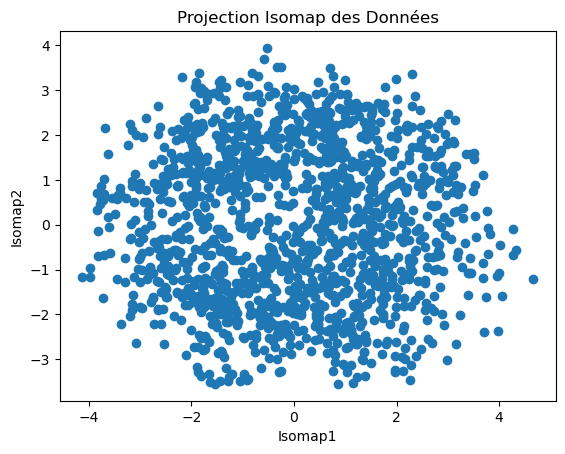

In [122]:
from sklearn.manifold import Isomap

# Normaliser les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Appliquer Isomap
isomap = Isomap(n_components=2, n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (n_neighbors)
isomap_result = isomap.fit_transform(scaled_features)

# Créer un DataFrame avec les résultats Isomap
isomap_Data = pd.DataFrame(data=isomap_result, columns=['Isomap1', 'Isomap2'])

# Concaténer les résultats Isomap avec le DataFrame d'origine
isomap_Data = pd.concat([Data.iloc[:, 0], isomap_Data], axis=1)

# Visualiser les résultats Isomap
plt.scatter(isomap_Data['Isomap1'], isomap_Data['Isomap2'])
plt.title('Projection Isomap des Données')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.show()


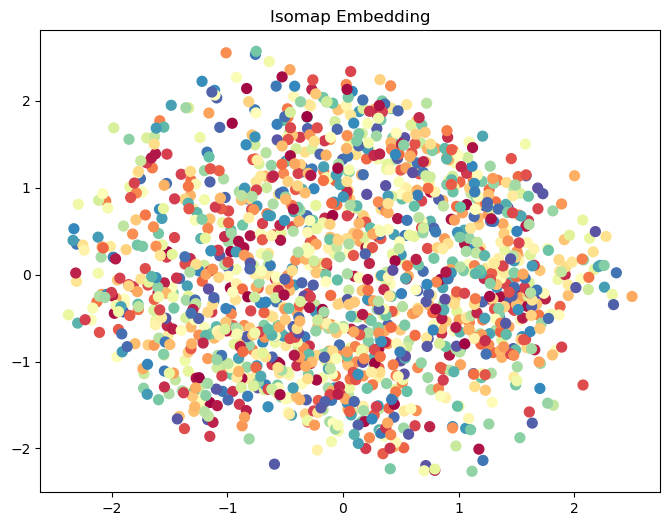

In [123]:
#Création d'un objet Isomap
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
#Application de l'Isomap aux données
S_isomap = isomap.fit_transform(S_points)
#Visualisation en deux dimensions
plot_2d(S_isomap, S_color, "Isomap Embedding")



# MDS



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


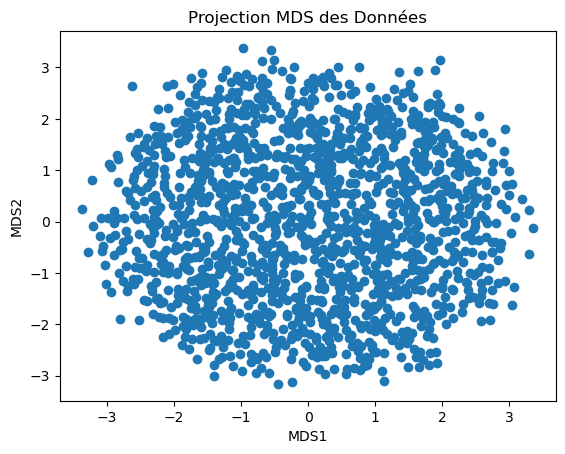

In [133]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt



# Convertir la première colonne (supposée être la colonne de date) en datetime
Data.iloc[:, 0] = pd.to_datetime(Data.iloc[:, 0])

# Sélectionner les caractéristiques numériques
features = Data.iloc[:, 1:].select_dtypes(include=['float64', 'int64'])

# Normaliser les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Appliquer MDS avec spécification explicite de normalized_stress
mds = MDS(n_components=2, random_state=42, dissimilarity='euclidean', n_init=1, max_iter=300, verbose=0, eps=0.001, n_jobs=None)
mds_result = mds.fit_transform(scaled_features)

# Créer un DataFrame avec les résultats MDS
mds_df = pd.DataFrame(data=mds_result, columns=['MDS1', 'MDS2'])

# Concaténer les résultats MDS avec le DataFrame d'origine
mds_Data = pd.concat([Data.iloc[:, 0], mds_Data], axis=1)

# Visualiser les résultats MDS
plt.scatter(mds_Data['MDS1'], mds_Data['MDS2'])
plt.title('Projection MDS des Données')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()


# Spectral

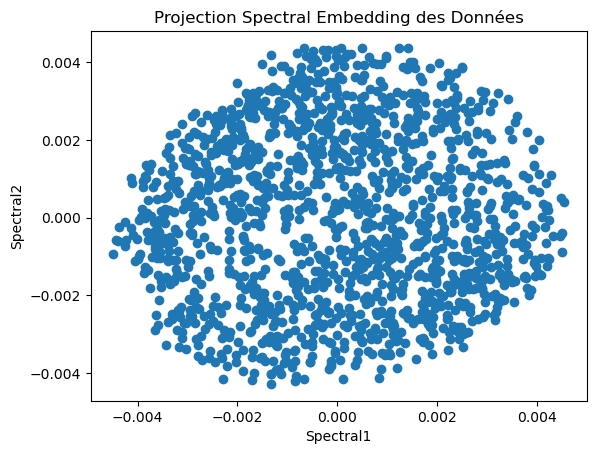

In [146]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt

#Data['Date'] = pd.to_datetime(Data['Date'])
Data.iloc[:, 0] = pd.to_datetime(Data.iloc[:, 0])

# Sélectionner les caractéristiques numériques
features = Data.iloc[:, 1:].select_dtypes(include=['float64', 'int64'])

# Normaliser les caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Appliquer Spectral Embedding
spectral_embedding = SpectralEmbedding(n_components=2, random_state=42)
spectral_result = spectral_embedding.fit_transform(scaled_features)

# Créer un DataFrame avec les résultats Spectral Embedding
spectral_Data = pd.DataFrame(data=spectral_result, columns=['Spectral1', 'Spectral2'])

# Concaténer les résultats Spectral Embedding avec le DataFrame d'origine
result_Data = pd.concat([Data.iloc[:, 0], spectral_Data], axis=1)

# Visualiser les résultats Spectral Embedding
plt.scatter(result_Data['Spectral1'], result_Data['Spectral2'])
plt.title('Projection Spectral Embedding des Données')
plt.xlabel('Spectral1')
plt.ylabel('Spectral2')
plt.show()


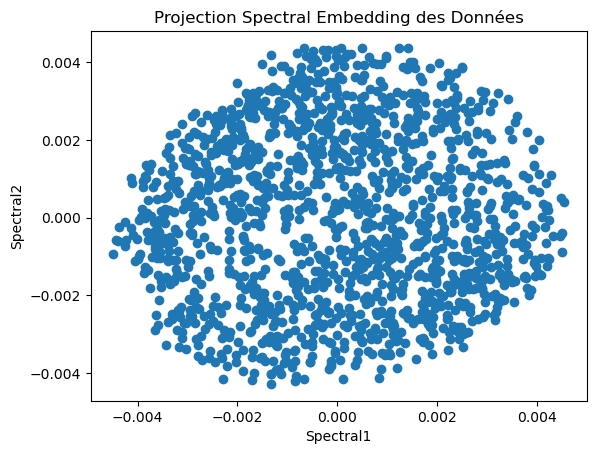

In [126]:
from sklearn.manifold import SpectralEmbedding
# Appliquer Spectral Embedding
spectral_embedding = SpectralEmbedding(n_components=2, random_state=42)
spectral_result = spectral_embedding.fit_transform(scaled_features)

# Créer un DataFrame avec les résultats Spectral Embedding
spectral_Data = pd.DataFrame(data=spectral_result, columns=['Spectral1', 'Spectral2'])

# Concaténer les résultats Spectral Embedding avec le DataFrame d'origine
spectral_Data = pd.concat([Data.iloc[:, 0], spectral_Data], axis=1)

# Visualiser les résultats Spectral Embedding
plt.scatter(spectral_Data['Spectral1'], spectral_Data['Spectral2'])
plt.title('Projection Spectral Embedding des Données')
plt.xlabel('Spectral1')
plt.ylabel('Spectral2')
plt.show()

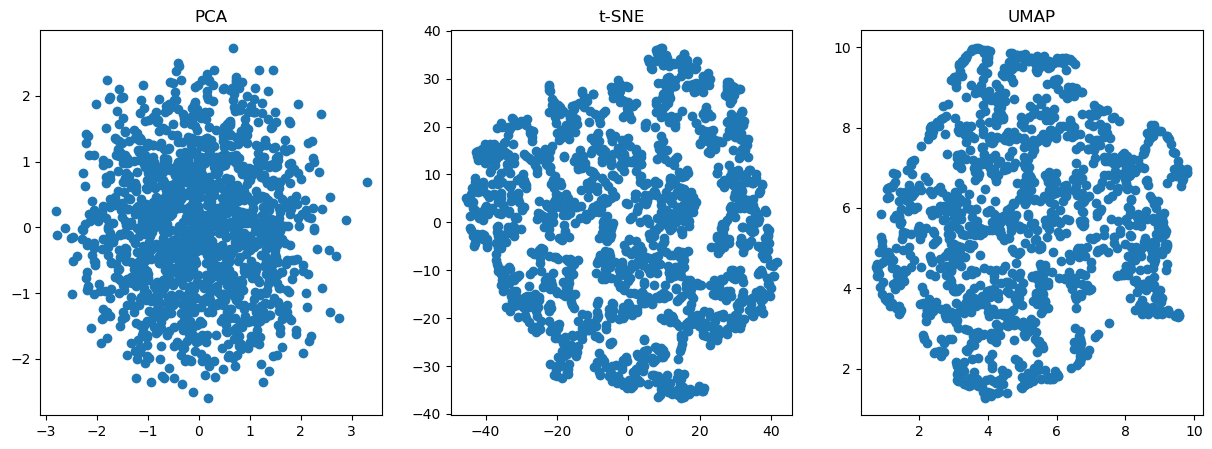

In [136]:
##Comparaison entre PCA, T-SNE et UMAP
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt

# Réduire la dimensionnalité avec PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Réduire la dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Réduire la dimensionnalité avec UMAP
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(scaled_features)

# Créer des DataFrames avec les résultats de chaque méthode
pca_Data = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
tsne_Data = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
umap_Data = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Concaténer les résultats avec le DataFrame d'origine
result_Data = pd.concat([Data.iloc[:, 0], pca_Data, tsne_Data, umap_Data], axis=1)

# Visualiser les résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# PCA
axes[0].scatter(result_Data['PCA1'], result_Data['PCA2'])
axes[0].set_title('PCA')

# t-SNE
axes[1].scatter(result_Data['t-SNE1'], result_Data['t-SNE2'])
axes[1].set_title('t-SNE')

# UMAP
axes[2].scatter(result_Data['UMAP1'], result_Data['UMAP2'])
axes[2].set_title('UMAP')

plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_2080\2606245634.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(embeddings[:, 0], embeddings[:, 1], c=color, cmap=plt.cm.get_cmap('viridis', max(color)+1))


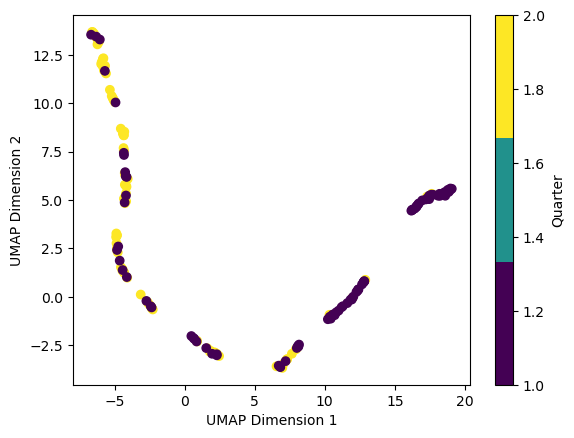

In [154]:
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np

# Chargement des données depuis le fichier CSV
data = pd.read_csv('C:/Users/pc/Desktop/bitcoin_scraped.csv')

# Conversion de la colonne 'Date' en format de date
data['Date'] = pd.to_datetime(data['Date'], format='%b %d, %Y')

# Extraction des trimestres
data['Quarter'] = data['Date'].dt.quarter

# Récupération de la liste des colonnes
columns_list = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Sélection des colonnes d'intérêt
selected_data = data[columns_list]

# Utilisation des trimestres comme couleurs
color = data['Quarter']

# Application de la méthode UMAP pour réduire la dimensionnalité à 2
um = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
embeddings = um.fit_transform(selected_data)

# Affichage de la visualisation en 2D avec des couleurs attribuées par trimestre
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=color, cmap=plt.cm.get_cmap('viridis', max(color)+1))
plt.colorbar(label='Quarter')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
